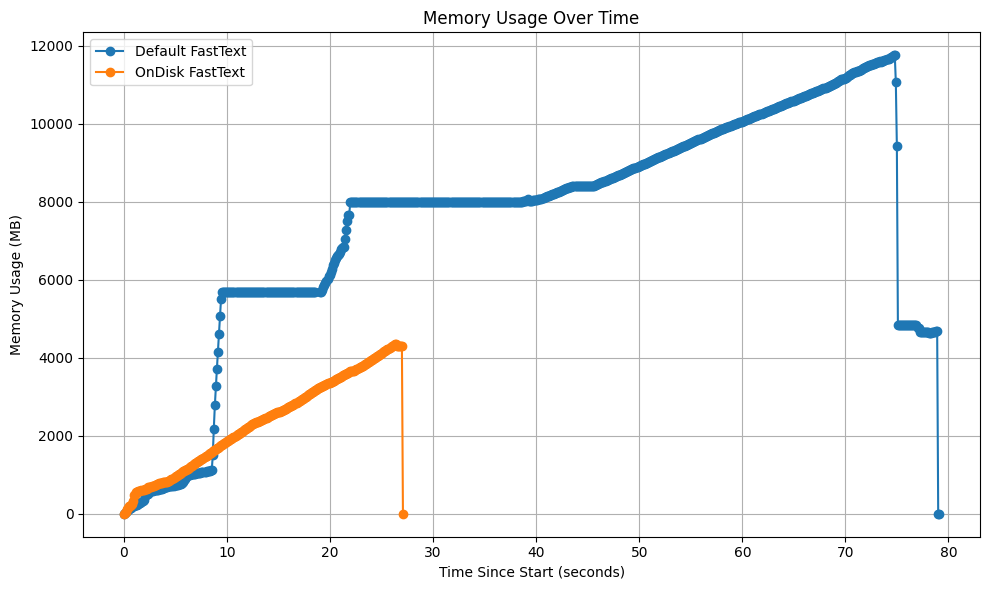

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def read_memory_file(filepath):
    memory = []
    timestamps = []
    with open(filepath, 'r') as f:
        for line in f:
            if line.startswith("MEM"):
                parts = line.split()
                memory.append(float(parts[1]))
                timestamps.append(float(parts[2]))
    return np.array(memory), np.array(timestamps) - timestamps[0]

def plot_memory_usage(file1, file2):
    memory1, time1 = read_memory_file(file1)
    memory2, time2 = read_memory_file(file2)    

    plt.figure(figsize=(10, 6))
    plt.plot(time1, memory1, label="Default FastText", marker='o')
    plt.plot(time2, memory2, label="OnDisk FastText", marker='o')

    plt.title("Memory Usage Over Time")
    plt.xlabel("Time Since Start (seconds)")
    plt.ylabel("Memory Usage (MB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

plot_memory_usage("mprofile_inmemory.dat", "mprofile_ondisk.dat")

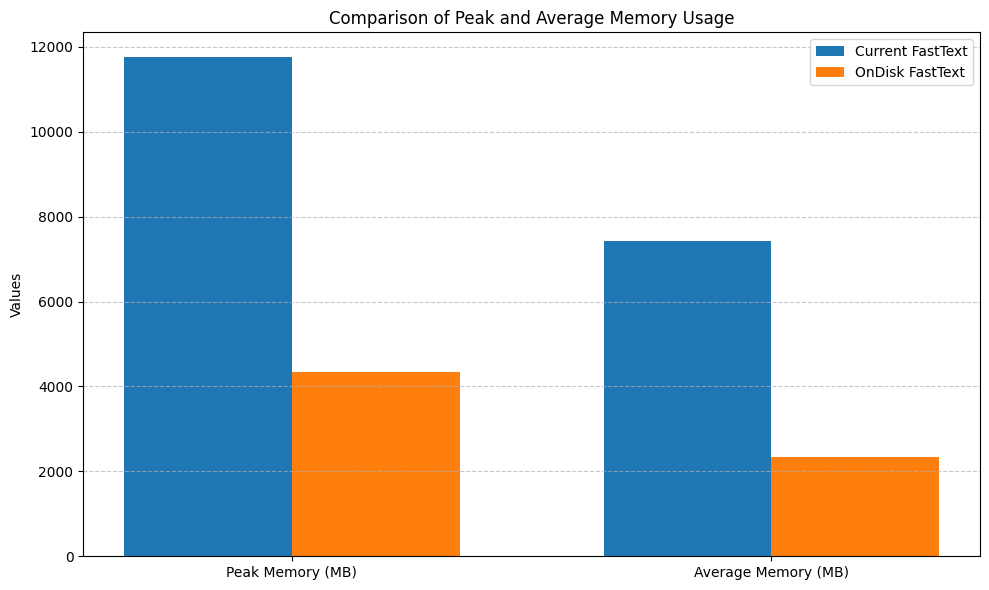

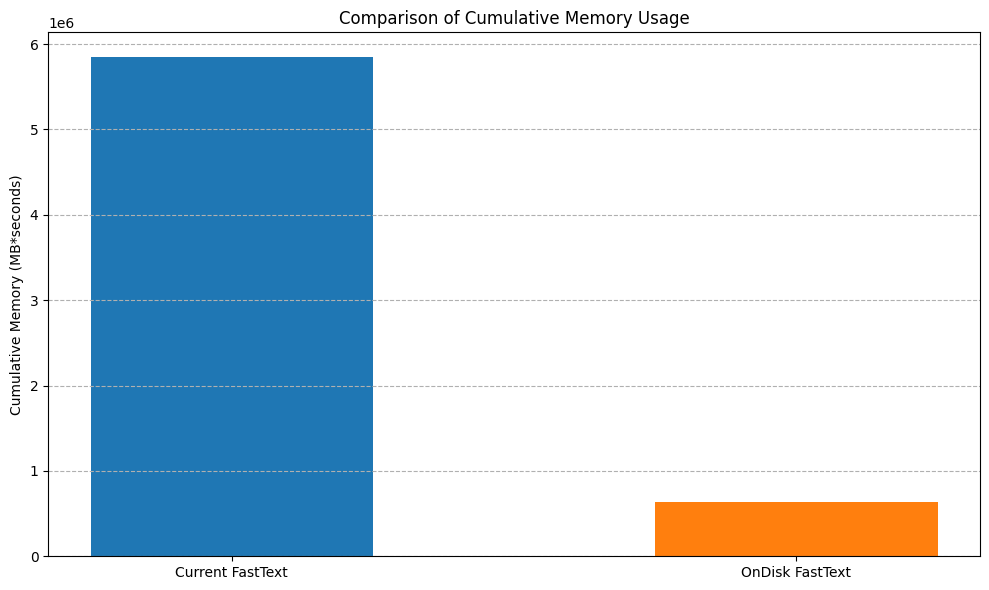

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def compare_memory_stats(file1, file2):
    def calculate_stats(memory):
        """Calculate useful stats for memory usage."""
        peak_memory = np.max(memory)
        average_memory = np.mean(memory)
        cumulative_memory = np.sum(memory)
        stats = {
            "peak_memory": peak_memory,
            "average_memory": average_memory,
            "cumulative_memory": cumulative_memory,
        }
        return stats

    memory1, _ = read_memory_file(file1)
    memory2, _ = read_memory_file(file2)
    stats1 = calculate_stats(memory1)
    stats2 = calculate_stats(memory2)

    labels = ["Peak Memory (MB)", "Average Memory (MB)"]
    values1 = [stats1["peak_memory"], stats1["average_memory"]]
    values2 = [stats2["peak_memory"], stats2["average_memory"]]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, values1, width, label="Current FastText")
    ax.bar(x + width/2, values2, width, label="OnDisk FastText")

    ax.set_title("Comparison of Peak and Average Memory Usage")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel("Values")
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#1f77b4', '#ff7f0e']
    ax.bar([0, 1], [stats1["cumulative_memory"], stats2["cumulative_memory"]],
           width=0.5, tick_label=["Current FastText", "OnDisk FastText"], color=colors)

    ax.set_title("Comparison of Cumulative Memory Usage")
    ax.set_ylabel("Cumulative Memory (MB*seconds)")
    ax.grid(True, axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()
    return stats1, stats2


stats1, stats2 = compare_memory_stats("mprofile_inmemory.dat", "mprofile_ondisk.dat")


In [21]:
(stats1['cumulative_memory'] - stats2['cumulative_memory']) / stats1['cumulative_memory']

0.8915935184275338